# 📋 Project ***Overview***  



This project builds a machine learning system to predict student academic performance based on study habits, attendance, and practice test results. The system includes both regression (predicting final scores) and classification (predicting pass/fail status) models.


# ***Step 1: Data Collection***

In [1]:
import numpy as np
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
data = pd.read_csv("/content/sample_data/studentPerformance.csv")


# ***Step 2: Data Preparation/Preprocessing***

In [3]:
data.isnull().sum()
#our data is clean from NONE value#

,0
Study_Hours,0
Attendance,0
Practice_Tests,0
Final_Score,0
Pass_Fail,0


In [4]:
data.shape

(500, 5)

In [5]:
data.dtypes

,0
Study_Hours,float64
Attendance,float64
Practice_Tests,int64
Final_Score,float64
Pass_Fail,int64


🎯 DATA QUALITY STATUS: EXCELLENT

   • No missing values detected

   • Dataset is complete and analysis-read
   
   • Raw data is available in a usable format

# ***Step 3: Exploratory Data Analysis (EDA)***

In [6]:
data.describe()

,Study_Hours,Attendance,Practice_Tests,Final_Score,Pass_Fail
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.985617,75.877906,2.068000,70.749858,0.840000
std,2.986884,14.859647,1.448991,19.537338,0.366973
min,0.050616,50.246999,0.000000,14.941156,0.000000
25%,2.412797,62.061402,1.000000,55.231234,1.000000
50%,5.131637,76.986917,2.000000,70.714751,1.000000
75%,7.561249,88.867188,3.000000,86.895891,1.000000
max,9.929648,99.970686,7.000000,100.000000,1.000000


In [7]:
data.head(10)

,Study_Hours,Attendance,Practice_Tests,Final_Score,Pass_Fail
0,3.745401,59.256646,1,53.580408,1
1,9.507143,77.095047,2,84.990141,1
2,7.319939,93.647292,3,100.000000,1
3,5.986585,86.611244,1,76.978847,1
4,1.560186,90.328057,0,46.875418,0
5,1.559945,82.939168,1,48.555757,0
6,0.580836,84.613828,2,54.415912,1
7,8.661761,92.459783,1,89.141944,1
8,6.011150,62.483400,4,78.601824,1
9,7.080726,74.471248,1,74.158730,1


In [8]:
data.describe()

,Study_Hours,Attendance,Practice_Tests,Final_Score,Pass_Fail
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.985617,75.877906,2.068000,70.749858,0.840000
std,2.986884,14.859647,1.448991,19.537338,0.366973
min,0.050616,50.246999,0.000000,14.941156,0.000000
25%,2.412797,62.061402,1.000000,55.231234,1.000000
50%,5.131637,76.986917,2.000000,70.714751,1.000000
75%,7.561249,88.867188,3.000000,86.895891,1.000000
max,9.929648,99.970686,7.000000,100.000000,1.000000


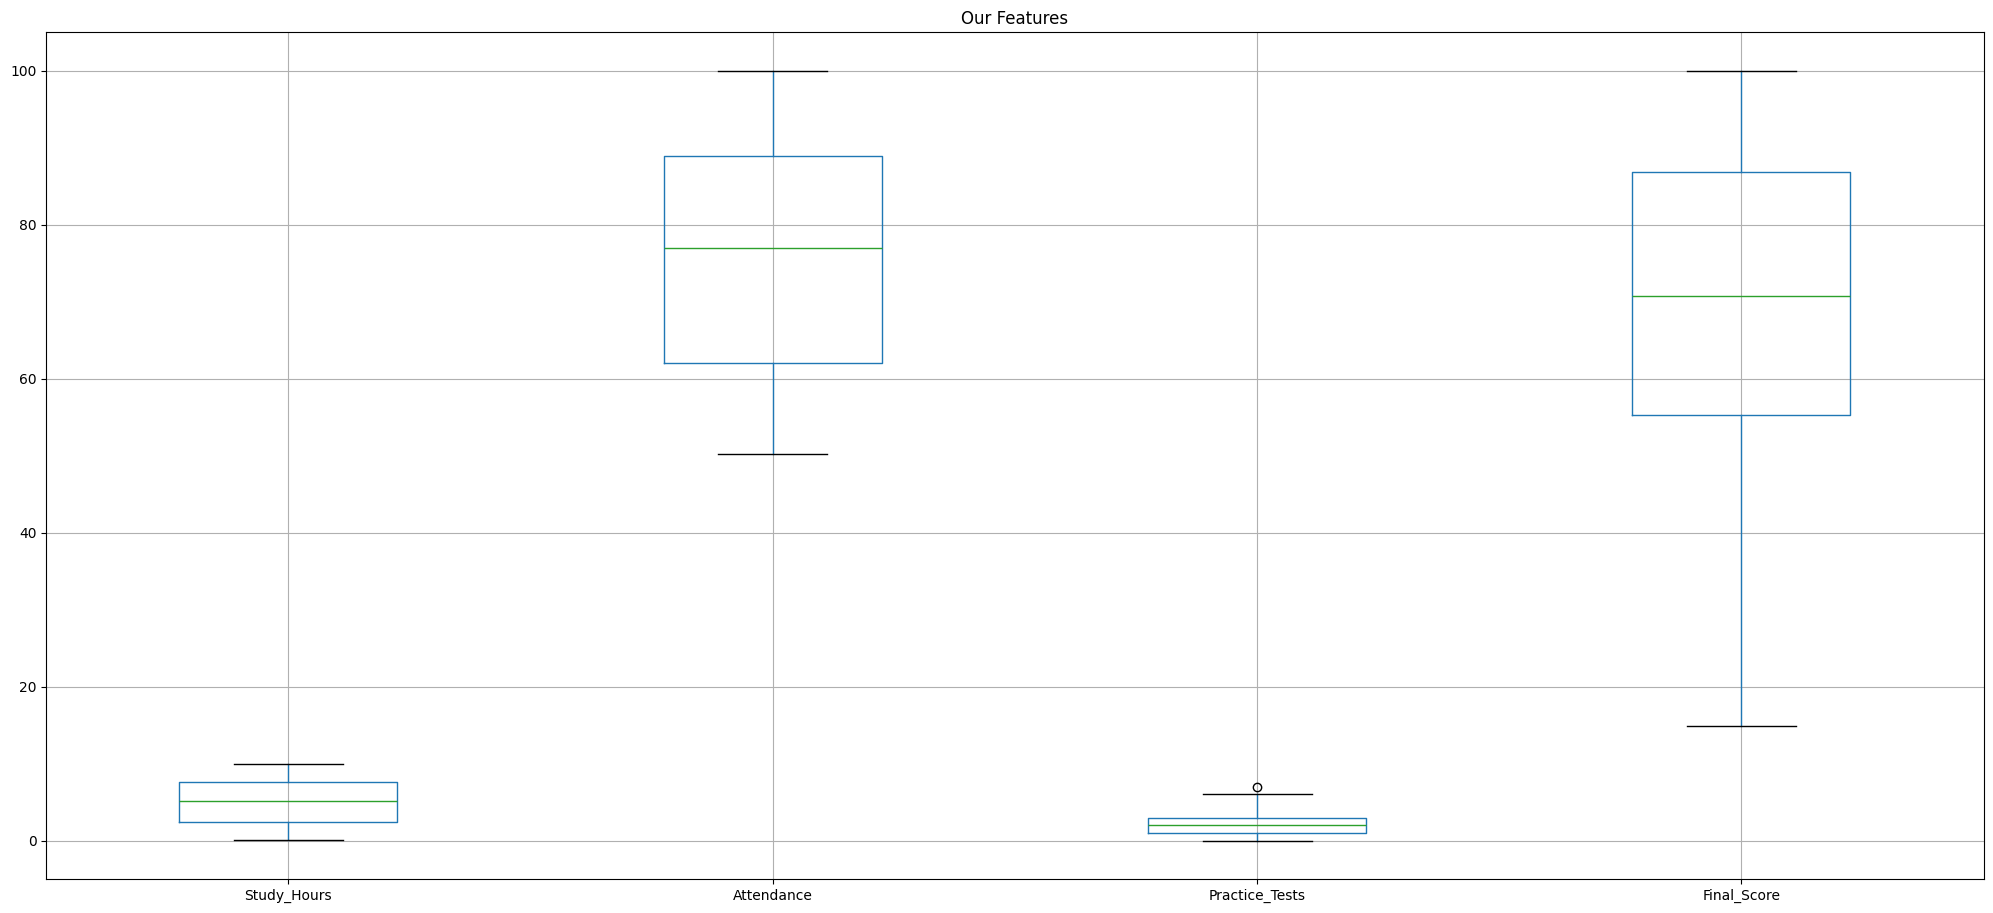

In [9]:
data.boxplot(column=['Study_Hours', 'Attendance', 'Practice_Tests', 'Final_Score'], figsize=(25, 11))
plt.title('Our Features')
plt.show()

Study Hours × Attendance = "Effective Learning Time"

Study Hours alone = Good correlation with final score

Attendance alone = Weak correlation with many outliers

BUT: Study Hours × Attendance = STRONG correlation!

# Step 5: Feature **Engineering** *texte en italique*

In [10]:
data['Magic_Feature'] = data['Study_Hours'] * data['Attendance']

features = ['Study_Hours', 'Attendance', 'Practice_Tests', 'Magic_Feature']
x = data[features]

y=data['Final_Score']

print(x.head() ,"\n"*3) ,
print (y.head(),"\n"*3),



   Study_Hours  Attendance  Practice_Tests  Magic_Feature
0     3.745401   59.256646               1     221.939914
1     9.507143   77.095047               2     732.953645
2     7.319939   93.647292               3     685.492503
3     5.986585   86.611244               1     518.505562
4     1.560186   90.328057               0     140.928607 



0     53.580408
1     84.990141
2    100.000000
3     76.978847
4     46.875418
Name: Final_Score, dtype: float64 





(None,)

## Step 7: Model Training - Linear ***Regression***



In [11]:
from sklearn.model_selection import train_test_split
xtrain , xtest, ytrain , ytest=train_test_split(x, y , test_size =0.1 )

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
model.fit(xtrain,ytrain)

LinearRegression()

In [14]:
ypredict= model.predict(xtest)

In [15]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest , ypredict)

3.699030535442244

In [16]:
model_error=mean_absolute_error(ytest , ypredict)/ytest.mean()
model_accuracy = 100 - (model_error * 100)
print(f"### Our model’s error rate is {model_error * 100:.5f}% ###")
print(f"### Our model’s accuracy is {model_accuracy:.5f}% ###")

### Our model’s error rate is 5.04897% ###
### Our model’s accuracy is 94.95103% ###


# Step 8: Model Training - Logistic ***Regression***




In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()#solver="lbfgs")

In [18]:
x=data[['Study_Hours','Attendance','Practice_Tests','Final_Score']]
z=data['Pass_Fail']
x_train_log, x_test_log, z_train, z_test = train_test_split(x, z, test_size=0.1)

In [19]:
logreg.fit(x_train_log,z_train)

LogisticRegression()

In [20]:
from sklearn.metrics import accuracy_score
z_pred = logreg.predict(x_test_log)
accuracy = accuracy_score(z_test, z_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.00%


# ***Step 9: Prediction Pipeline***

In [21]:
def predict(Study_Hours1 ,Attendance1, Practice_Tests1 ):
  try:
    failpass=""
    student_data_lr = [[Study_Hours1, Attendance1, Practice_Tests1]]
    predicted_score = model.predict(student_data_lr)[0]
    predicted_score = max(0, min(100, predicted_score))
    student_data_log = np.array([[Study_Hours1, Attendance1, Practice_Tests1, predicted_score]])
    predicted_pass_fail = logreg.predict(student_data_log)[0]
    if predicted_pass_fail==1:
      failpass="Status: Passed 🎉"
    else:
      failpass="Status: Failed 😔"

    return f"\n✅Predicted Final Score:  {predicted_score:.2f}",f"\n   {failpass}   ", f"\n {'congratulation🎉🥳 you passed the exam ' if predicted_pass_fail==1 else 'Unfortunately, you did not pass. Keep trying! 💪'}",

  except Exception as e:
    return f"ERROR❌ :{e}", f"ERROR❌ :{e}"


# ***Step 10: Web Interface (Gradio)***

In [22]:
iface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Study_Hours"),
        gr.Number(label="Attendance"),
        gr.Number(label="Practice_Tests"),
    ],
    outputs=[
        gr.Text(label="Final_Score and Pass_Fail"),
        gr.Text(label="Pass_Fail"),
        gr.Text(label= "Result")
                    ],
    title ="STUDENT PERFORMENCE",
    description ="enter a three value to predict the result of our student",




)
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://35f75b2dbdf8b5afe6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


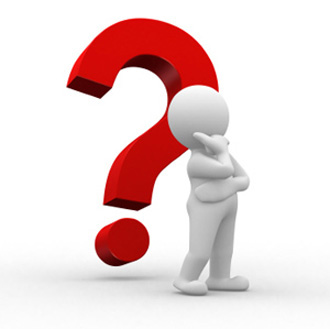

À chaque fois que je veux faire une prédiction, je dois ré-entraîner mes modèles depuis le début, ce qui prend du temps et des ressources inutilement.

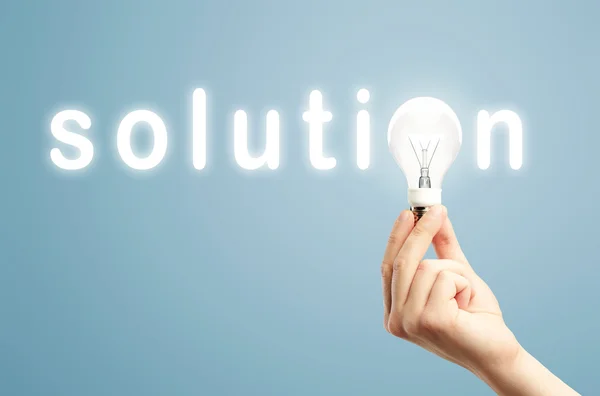

In [23]:
import joblib
joblib.dump(model, "trained_model.pkl")
joblib.dump(logreg, "trained_model_log.pkl")

['trained_model_log.pkl']